# Cleaning the Input Data

The file "FifaTrainNew.csv" consists of almost 80 attributes of 12745 players from the game FIFA 19. Our initial aim is to make sense of this data and cleaning it up into a format that can be used as an input to our regression model.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('FifaTrainNew.csv')

In [4]:
df

,Ob,WageNew,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1,26735,25,Austria,77,80,FC Augsburg,1971,Left,2.0,...,64.0,65.0,77.0,78.0,77.0,14.0,14.0,9.0,13.0,10.0
1,2,3709,22,Saudi Arabia,58,67,Al Wehda,1510,Right,1.0,...,48.0,43.0,52.0,54.0,56.0,7.0,7.0,12.0,11.0,14.0
2,3,4720,29,Austria,66,66,LASK Linz,1356,Right,1.0,...,42.0,63.0,65.0,64.0,66.0,9.0,11.0,8.0,6.0,12.0
3,4,31062,24,Sweden,71,73,Watford,1824,Left,1.0,...,44.0,62.0,36.0,49.0,48.0,7.0,11.0,10.0,16.0,7.0
4,5,43797,26,Colombia,80,84,Valencia CF,1847,Right,2.0,...,46.0,73.0,77.0,80.0,82.0,14.0,13.0,8.0,11.0,14.0
5,6,7005,30,China PR,67,67,Hebei China Fortune FC,1785,Right,1.0,...,32.0,50.0,63.0,66.0,61.0,8.0,9.0,10.0,11.0,15.0
6,7,4331,19,Mexico,61,75,Monterrey,1471,Left,1.0,...,45.0,45.0,64.0,63.0,62.0,9.0,12.0,7.0,12.0,10.0
7,8,5997,32,Argentina,67,67,Patronato,1795,Right,1.0,...,59.0,64.0,45.0,61.0,53.0,14.0,7.0,5.0,7.0,8.0
8,9,432,26,Ivory Coast,75,75,NaN,1815,Left,1.0,...,71.0,78.0,26.0,33.0,32.0,13.0,8.0,10.0,9.0,10.0
9,10,29925,21,Netherlands,74,82,FC Porto,1989,Right,2.0,...,46.0,72.0,69.0,67.0,64.0,6.0,11.0,12.0,14.0,10.0


In [5]:
df.dtypes

Ob                            int64
WageNew                       int64
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                           object
ST                           object
RS                           object
LW                           object
LF                           object
CF                           object
RF                          

Looking at the data types of the different columns, we notice that attributes like Weight, Height, LS, ST, etc. are not float64. Since these columns contain numerical information, it is quite straightforward to make the changes necessary to convert these attributes to float64 as well.

In [6]:
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
       'RDM','RWB','LB','LCB','CB','RCB','RB']
array = np.zeros(len(df))

for j in range(len(positions)):
    col = df.loc[:,positions[j]]
    i = 0
    for data in col:
        data = str(data)
        try:
            (a,b) = data.split('+')
            data = int(a)+int(b)
        except ValueError:
            data = 0
        array[i] = data
        i = i+1
    df.loc[:,positions[j]] = array

In [7]:
array = np.zeros(len(df))
col = df.loc[:,'Height']
i = 0
for data in col:
    data = str(data)
    try:
        (a,b) = data.split("'")
        data = 12*int(a)+int(b)
    except ValueError:
        data = 0
    array[i] = data
    i = i+1
df.loc[:,'Height'] = array

In [8]:
array = np.zeros(len(df))
col = df.loc[:,'Weight']
i = 0
for data in col:
    data = str(data)
    try:
        a = data.replace("lbs",'')
        data = int(a)
    except ValueError:
        data = 0
    array[i] = data
    i = i+1
df.loc[:,'Weight'] = array

In [9]:
df.dtypes

Ob                            int64
WageNew                       int64
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                      float64
Weight                      float64
LS                          float64
ST                          float64
RS                          float64
LW                          float64
LF                          float64
CF                          float64
RF                          

# Removing Redundant / Unnecessary Attributes

It is clearly visible that the ratings for different positions are pretty much similar. So it doesn't make sense to keep all of that redundant data. Hence, we decide to create a new column containing the average value of all the ratings for the different positions. Subsequently, we delete all the columns for different positions along with other columns such as Body Type, Real Face, etc. which do not seem to affect our regression model much.

In [10]:
df_positions = df[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
       'RDM','RWB','LB','LCB','CB','RCB','RB']]
df['Positions Average'] = df_positions.mean(numeric_only=True, axis=1)

Text(0,0.5,'Wage')

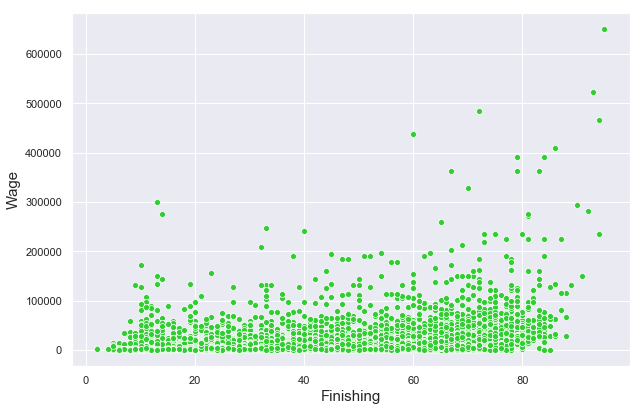

In [11]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6.5))
x = df.Finishing
y = df.WageNew
ax = sns.scatterplot(x,y,color='limegreen')
ax.set_xlabel("Finishing", size = 15)
ax.set_ylabel("Wage", size = 15)

Text(0,0.5,'Wage')

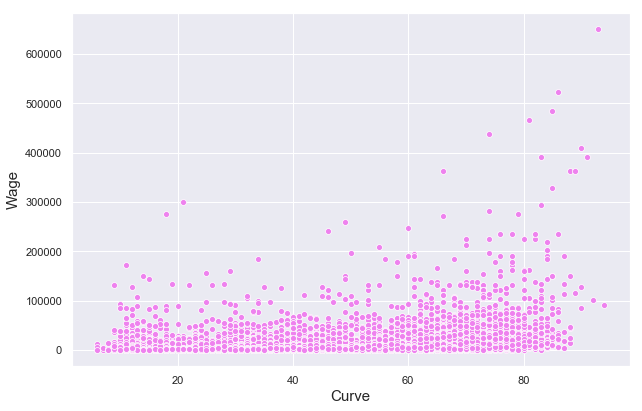

In [12]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6.5))
x = df.Curve
y = df.WageNew
ax = sns.scatterplot(x,y,color='violet')
ax.set_xlabel("Curve", size = 15)
ax.set_ylabel("Wage", size = 15)

The plot above shows basically a random distribution of wages with respect to the finishing as well as the curve ratings. Such a random spread can be seen for other skills as well. Hence, we drop these features as well from the dataframe.

In [13]:
columns = ['Nationality','Preferred Foot','Work Rate','Body Type','Real Face','Joined', 'Loaned From',
       'Contract Valid Until','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM',
       'LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy',
       'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
       'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
       'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
       'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

for i in range(len(columns)):
    del df[columns[i]]

In [14]:
df

,Ob,WageNew,Age,Overall,Potential,Club,Special,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Positions Average
0,1,26735,25,77,80,FC Augsburg,1971,2.0,3.0,2.0,LCB,72.0,183.0,68.615385
1,2,3709,22,58,67,Al Wehda,1510,1.0,3.0,2.0,RB,70.0,132.0,55.000000
2,3,4720,29,66,66,LASK Linz,1356,1.0,3.0,2.0,RCB,75.0,183.0,48.384615
3,4,31062,24,71,73,Watford,1824,1.0,3.0,3.0,LM,71.0,152.0,65.384615
4,5,43797,26,80,84,Valencia CF,1847,2.0,2.0,2.0,LCB,72.0,172.0,66.807692
5,6,7005,30,67,67,Hebei China Fortune FC,1785,1.0,3.0,3.0,RB,71.0,176.0,65.153846
6,7,4331,19,61,75,Monterrey,1471,1.0,2.0,2.0,CB,72.0,159.0,52.961538
7,8,5997,32,67,67,Patronato,1795,1.0,3.0,3.0,LM,67.0,148.0,64.384615
8,9,432,26,75,75,NaN,1815,1.0,3.0,4.0,CAM,70.0,165.0,65.961538
9,10,29925,21,74,82,FC Porto,1989,2.0,3.0,3.0,CM,72.0,163.0,73.038462


# Adding New Features

The next step is to add some features which might help the model predict wages better. This does involve a significant amount of trial and error.

Text(0,0.5,'Wage')

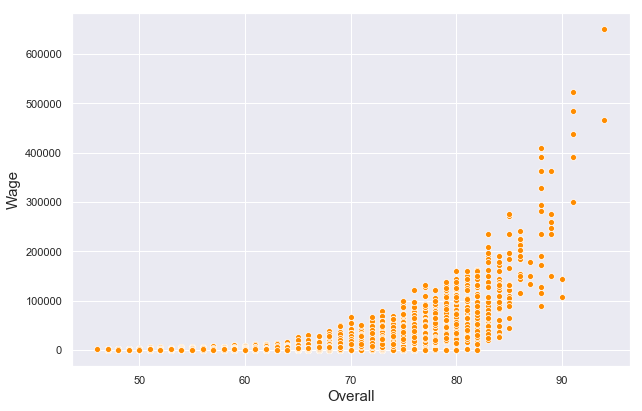

In [15]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6.5))
x = df.Overall
y = df.WageNew
ax = sns.scatterplot(x,y,color='darkorange')
ax.set_xlabel("Overall", size = 15)
ax.set_ylabel("Wage", size = 15)

The figure above shows an exponential relationship between the overall ratings and the players' wages. Hence, it is sensible to add a feature which grows exponentially with the overall rating. After testing a couple of different values, this particular fit gave the best results. Adding a quadratic term also seemed to slightly improve the model's performance.

Text(0,0.5,'Exponential Fit')

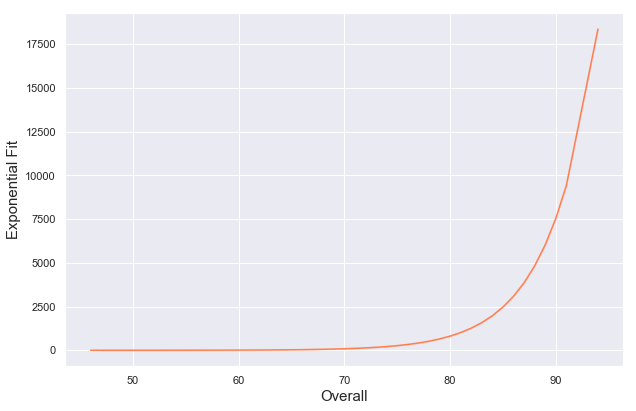

In [16]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 6.5))
x = df.Overall
y = 1.25**(x-50)
ax = sns.lineplot(x,y,color='coral')
ax.set_xlabel("Overall", size = 15)
ax.set_ylabel("Exponential Fit", size = 15)

In [17]:
x = df.Overall
df['Exponential Term'] = 1.25**(x-50)
df['Quadratic Term'] = x**2

In [18]:
df

,Ob,WageNew,Age,Overall,Potential,Club,Special,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Positions Average,Exponential Term,Quadratic Term
0,1,26735,25,77,80,FC Augsburg,1971,2.0,3.0,2.0,LCB,72.0,183.0,68.615385,413.590306,5929
1,2,3709,22,58,67,Al Wehda,1510,1.0,3.0,2.0,RB,70.0,132.0,55.000000,5.960464,3364
2,3,4720,29,66,66,LASK Linz,1356,1.0,3.0,2.0,RCB,75.0,183.0,48.384615,35.527137,4356
3,4,31062,24,71,73,Watford,1824,1.0,3.0,3.0,LM,71.0,152.0,65.384615,108.420217,5041
4,5,43797,26,80,84,Valencia CF,1847,2.0,2.0,2.0,LCB,72.0,172.0,66.807692,807.793567,6400
5,6,7005,30,67,67,Hebei China Fortune FC,1785,1.0,3.0,3.0,RB,71.0,176.0,65.153846,44.408921,4489
6,7,4331,19,61,75,Monterrey,1471,1.0,2.0,2.0,CB,72.0,159.0,52.961538,11.641532,3721
7,8,5997,32,67,67,Patronato,1795,1.0,3.0,3.0,LM,67.0,148.0,64.384615,44.408921,4489
8,9,432,26,75,75,NaN,1815,1.0,3.0,4.0,CAM,70.0,165.0,65.961538,264.697796,5625
9,10,29925,21,74,82,FC Porto,1989,2.0,3.0,3.0,CM,72.0,163.0,73.038462,211.758237,5476


To use the Club data in a meaningful, we tried to find information online about the expenditure of various clubs on players' wages. https://en.as.com/en/2018/01/17/football/1516210881_006124.html lists the top 20 European clubs that spend the most of players' wage. Furthermore, we were able to extract the average weekly wage expenditure of about 167 clubs with the help of this Global Sports Salary Survey list: https://globalsportssalaries.com/. The relevant information was noted down and can be found in the following excel sheets: 'Top20Clubs.xlsx' and 'AverageWeeklyWages.xlsx'.

In [19]:
topclubs = pd.read_excel('Top20Clubs.xlsx')

In [20]:
topclubs

,Club,Wages
0,FC Barcelona,372
1,Manchester United,321
2,Real Madrid,307
3,Chelsea,298
4,Manchester City,294
5,Paris Saint-Germain,292
6,Liverpool,281
7,FC Bayern M<fc>nchen,270
8,Arsenal,263
9,Juventus,221


In [21]:
wages = topclubs.Wages
top20club = topclubs.Club
club = df.Club

array_1 = np.zeros(len(club))

for i in range(len(club)):
    for j in range(len(top20club)):
        if club[i] == top20club[j]:
            array_1[i] = wages[j]

In [22]:
wage_data = pd.read_excel('AverageWeeklyWages.xlsx')

In [23]:
wage_data

,Club,WeeklyPay
0,FC Barcelona,264533
1,Real Madrid,204698
2,Juventus,170209
3,Manchester United,165352
4,FC Bayern M<fc>nchen,160741
5,Atl<e9>tico Madrid,155747
6,Paris Saint-Germain,154501
7,Manchester City,151646
8,Chelsea,127025
9,Liverpool,123052


In [24]:
weeklypay = wage_data.WeeklyPay
team = wage_data.Club
club = df.Club

array_2 = np.zeros(len(club))

for i in range(len(club)):
    for j in range(len(team)):
        if club[i] == team[j]:
            array_2[i] = weeklypay[j]

While testing the neural network, it was seen that the model was often overestimating wages for players belonging to the teams like FC Barcelona, Manchester United, etc. i.e., the players which were assigned values using both the lists. So we decided to only assign values using the first list for the players from the top 20 highest wage spending European clubs, and not from the second.

In [25]:
for i in range(len(array_1)):
    if array_1[i] != 0:
        array_2[i] = 0

In [26]:
df['Top 20 Clubs'] = array_1
df['Average Club Wages'] = array_2
del df['Club']
del df['Position']

We tried using the positions of the players to find another meaningful numerical attribute that we could use, but we failed to make any substanstial progress, so we finally decide to delete that column as well.

In [27]:
df

,Ob,WageNew,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Positions Average,Exponential Term,Quadratic Term,Top 20 Clubs,Average Club Wages
0,1,26735,25,77,80,1971,2.0,3.0,2.0,72.0,183.0,68.615385,413.590306,5929,0.0,14316.0
1,2,3709,22,58,67,1510,1.0,3.0,2.0,70.0,132.0,55.000000,5.960464,3364,0.0,0.0
2,3,4720,29,66,66,1356,1.0,3.0,2.0,75.0,183.0,48.384615,35.527137,4356,0.0,0.0
3,4,31062,24,71,73,1824,1.0,3.0,3.0,71.0,152.0,65.384615,108.420217,5041,0.0,0.0
4,5,43797,26,80,84,1847,2.0,2.0,2.0,72.0,172.0,66.807692,807.793567,6400,0.0,72395.0
5,6,7005,30,67,67,1785,1.0,3.0,3.0,71.0,176.0,65.153846,44.408921,4489,0.0,41214.0
6,7,4331,19,61,75,1471,1.0,2.0,2.0,72.0,159.0,52.961538,11.641532,3721,0.0,0.0
7,8,5997,32,67,67,1795,1.0,3.0,3.0,67.0,148.0,64.384615,44.408921,4489,0.0,0.0
8,9,432,26,75,75,1815,1.0,3.0,4.0,70.0,165.0,65.961538,264.697796,5625,0.0,0.0
9,10,29925,21,74,82,1989,2.0,3.0,3.0,72.0,163.0,73.038462,211.758237,5476,0.0,0.0


This is the version of the data that will serve as the input for the neural network.

In [28]:
df.to_csv('FIFATrainModel.csv')

# Preparing the Test File

Finally, we need to make the same changes to the test file as we did to the train file in order to use it as input for our neural network and hence, make predictions for the players' wages.

In [29]:
test = pd.read_csv('FifaTestNoYvalues.csv')

In [30]:
positions = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
       'RDM','RWB','LB','LCB','CB','RCB','RB']
array = np.zeros(len(test))

for j in range(len(positions)):
    col = test.loc[:,positions[j]]
    i = 0
    for data in col:
        data = str(data)
        try:
            (a,b) = data.split('+')
            data = int(a)+int(b)
        except ValueError:
            data = 0
        array[i] = data
        i = i+1
    test.loc[:,positions[j]] = array

In [31]:
array = np.zeros(len(test))
col = test.loc[:,'Height']
i = 0
for data in col:
    data = str(data)
    try:
        (a,b) = data.split("'")
        data = 12*int(a)+int(b)
    except ValueError:
        data = 0
    array[i] = data
    i = i+1
test.loc[:,'Height'] = array

In [32]:
array = np.zeros(len(test))
col = test.loc[:,'Weight']
i = 0
for data in col:
    data = str(data)
    try:
        a = data.replace("lbs",'')
        data = int(a)
    except ValueError:
        data = 0
    array[i] = data
    i = i+1
test.loc[:,'Weight'] = array

In [33]:
test_positions = test[['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
       'RDM','RWB','LB','LCB','CB','RCB','RB']]
test['Positions Average'] = test_positions.mean(numeric_only=True, axis=1)

columns = ['Nationality','Preferred Foot','Work Rate','Body Type','Real Face','Joined', 'Loaned From',
       'Contract Valid Until','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM',
       'LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy',
       'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration',
       'SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots',
       'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
       'SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']

for i in range(len(columns)):
    del test[columns[i]]

In [34]:
x = test.Overall
test['Exponential Term'] = 1.25**(x-50)
test['Quadratic Term'] = x**2

In [35]:
wages = topclubs.Wages
top20club = topclubs.Club
club = test.Club

array_1 = np.zeros(len(club))

for i in range(len(club)):
    for j in range(len(top20club)):
        if club[i] == top20club[j]:
            array_1[i] = wages[j]

In [36]:
weeklypay = wage_data.WeeklyPay
team = wage_data.Club
club = test.Club

array_2 = np.zeros(len(club))

for i in range(len(club)):
    for j in range(len(team)):
        if club[i] == team[j]:
            array_2[i] = weeklypay[j]

In [37]:
for i in range(len(array_1)):
    if array_1[i] != 0:
        array_2[i] = 0
        
test['Top 20 Clubs'] = array_1
test['Average Club Wages'] = array_2
del test['Club']
del test['Position']      

In [38]:
test

,Ob,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Positions Average,Exponential Term,Quadratic Term,Top 20 Clubs,Average Club Wages
0,12746,26,60,60,1549,1.0,4.0,2.0,71.0,168.0,54.000000,9.313226,3600,0.0,0.0
1,12747,21,64,74,1755,1.0,3.0,3.0,70.0,152.0,63.346154,22.737368,4096,0.0,0.0
2,12748,19,55,72,1207,1.0,3.0,2.0,71.0,157.0,40.269231,3.051758,3025,0.0,0.0
3,12749,27,72,73,1534,1.0,2.0,2.0,73.0,185.0,56.846154,135.525272,5184,0.0,0.0
4,12750,32,74,74,1470,2.0,3.0,2.0,74.0,176.0,54.000000,211.758237,5476,0.0,21603.0
5,12751,26,66,69,1561,1.0,2.0,2.0,69.0,154.0,58.807692,35.527137,4356,0.0,0.0
6,12752,24,72,79,1962,1.0,3.0,3.0,72.0,185.0,71.576923,135.525272,5184,0.0,0.0
7,12753,21,60,69,1588,1.0,3.0,3.0,71.0,154.0,59.230769,9.313226,3600,0.0,0.0
8,12754,28,71,71,1840,1.0,3.0,3.0,71.0,176.0,68.769231,108.420217,5041,0.0,0.0
9,12755,21,62,68,1580,1.0,3.0,2.0,72.0,165.0,58.307692,14.551915,3844,0.0,13866.0


In [39]:
test.to_csv('FIFATestModel.csv')